# GROUP 6 - MUSHROOM DATASET CLASSIFICATION USING DECISION  TREE MODEL

Buhari Rianat, Gbadebo Oluwajumilo, Fashola Ganiyat

Classifying mushrooms into edible or poisonous class
Missing values in stalk root are represented by ?

Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
mush = pd.read_csv('mushrooms.csv')
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
mush.shape

(8124, 23)

In [4]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mush.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The result of the above info indicate there were no missing value. However, report from the dataset states that the missing values in stalk root are represented by ?. The code shows the number of missing values.

In [7]:
#print values classified as missing for stalk-root:
m = (mush.iloc[: , 11] == '?').sum()
m


2480

In [8]:
mush.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
mush.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
mush['class'].unique()

array(['p', 'e'], dtype=object)

In [11]:
mush['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [12]:
mush['veil-type'].unique()

array(['p'], dtype=object)

Dropping the stalk-root because it contains missing values and not significant, as well as the veil type because it has just one unique value that cannot be classified.

In [13]:
new_mush = mush.drop(['stalk-root', 'veil-type'], axis = 1)
new_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


DATA EXPLORATION

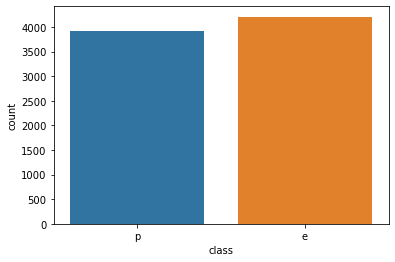

In [14]:
#countplot to determine the number of poisonous and edible mushrooms
sns.countplot(data = new_mush , x ='class')
xlabel = 'class'
ylabel = 'count'
plt.show()

<Figure size 936x432 with 0 Axes>

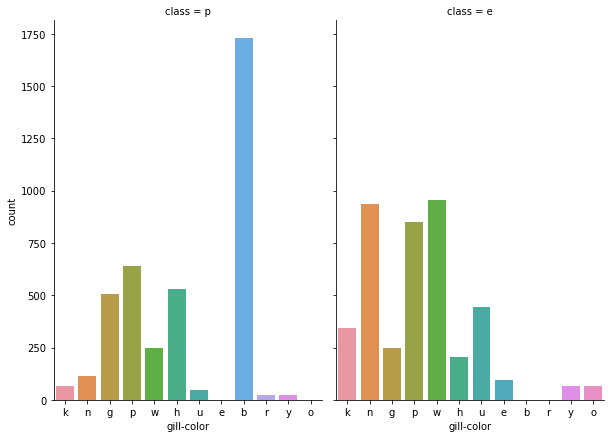

In [15]:
plt.figure(figsize =(13,6))
f = sns.catplot(x = 'gill-color', col = 'class' , data = new_mush, kind = 'count', height = 6, aspect = .7,
               alpha = 1)

Gill-color shows that buff is highly poisonous compared to the rest.

<Figure size 936x432 with 0 Axes>

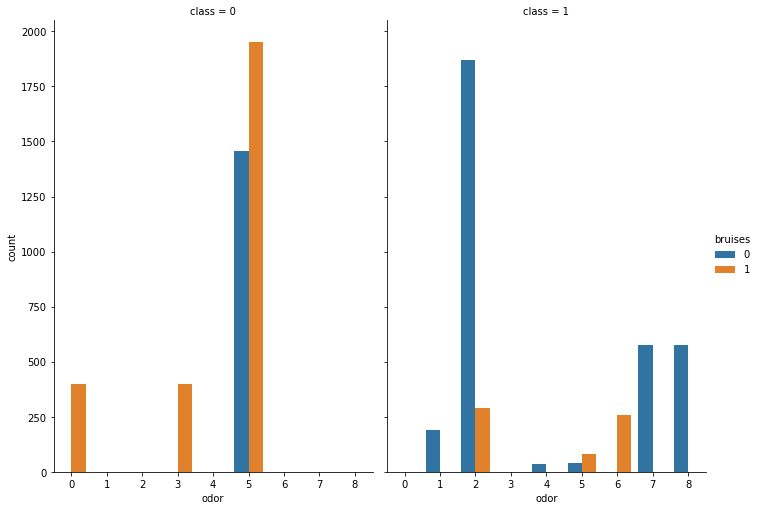

In [52]:
plt.figure(figsize =(13,6))
g = sns.catplot(x = 'odor', hue = 'bruises', col = 'class' , data = new_mush, kind = 'count', height = 7, aspect = .7,
               alpha = 1)

The plot above shows that mushroom with fishy odor and bruises are highly poisonous and mushroom with no odor and bruises are edible.

Using heatmap to find correlation among featured variables in order to drop them.

<AxesSubplot:>

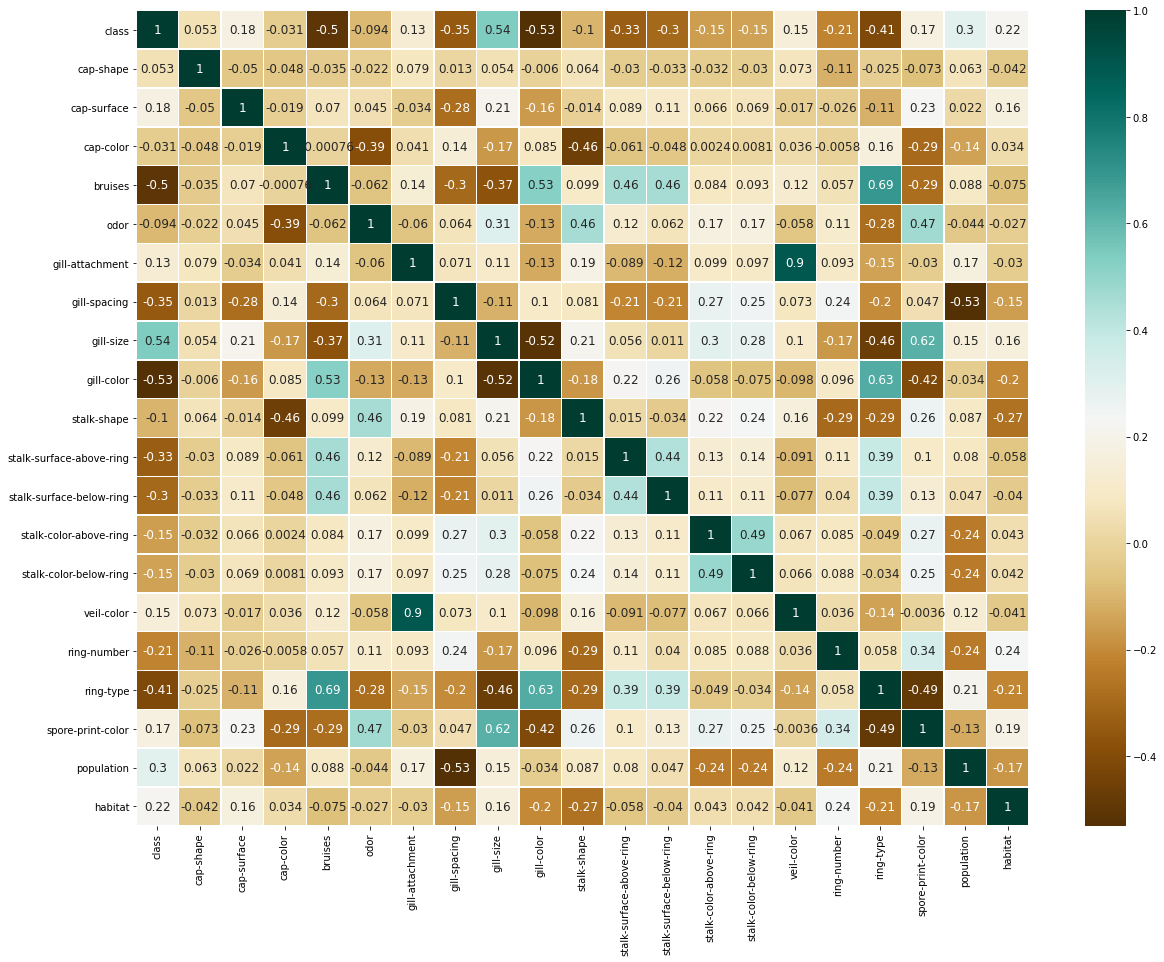

In [85]:
plt.figure(figsize = (20, 15))
sns.heatmap(new_mush.corr(), linewidths = .5, annot = True, cmap = 'BrBG',
           annot_kws={"size": 12})


In [70]:
new_mush.corr().T.mean()

class                      -0.020672
cap-shape                   0.041150
cap-surface                 0.073294
cap-color                  -0.007245
bruises                     0.107585
odor                        0.086770
gill-attachment             0.117746
gill-spacing                0.001014
gill-size                   0.110392
gill-color                  0.018440
stalk-shape                 0.069119
stalk-surface-above-ring    0.118076
stalk-surface-below-ring    0.109700
stalk-color-above-ring      0.137371
stalk-color-below-ring      0.136651
veil-color                  0.113213
ring-number                 0.072899
ring-type                   0.033038
spore-print-color           0.112741
population                  0.026539
habitat                     0.036017
dtype: float64

Dropping correlating features

In [14]:
mushroom = new_mush.drop(['gill-attachment', 'stalk-surface-above-ring', 'stalk-color-above-ring', 'veil-color'], axis = 1)
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-below-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,c,n,k,e,s,w,o,p,k,s,u
1,e,x,s,y,t,a,c,b,k,e,s,w,o,p,n,n,g
2,e,b,s,w,t,l,c,b,n,e,s,w,o,p,n,n,m
3,p,x,y,w,t,p,c,n,n,e,s,w,o,p,k,s,u
4,e,x,s,g,f,n,w,b,k,t,s,w,o,e,n,a,g


Changing the data type from object to category because of the presence of unique values.

In [15]:
mushroom = mushroom.astype('category')
mushroom.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-surface-below-ring    category
stalk-color-below-ring      category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [16]:
# Using labelencoder to convert categorical variable to ordinal numerical variable
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in mushroom.columns:
    mushroom[column] = labelencoder.fit_transform(mushroom[column])
    

In [17]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-below-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,2,7,1,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,7,1,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,7,1,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,2,7,1,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,2,7,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,11,0,2,5,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,11,0,2,5,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,5,0,2,5,1,4,0,1,2
8122,1,3,3,4,0,8,0,1,0,1,1,7,1,0,7,4,2


In [18]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-below-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,2,7,1,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,7,1,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,7,1,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,2,7,1,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,2,7,1,0,3,0,1


In [19]:
# Dropping class column to set others as x
X = mushroom.drop(['class'], axis = 1)
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-below-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,0,2,7,1,4,2,3,5
1,5,2,9,1,0,0,0,4,0,2,7,1,4,3,2,1
2,0,2,8,1,3,0,0,5,0,2,7,1,4,3,2,3
3,5,3,8,1,6,0,1,5,0,2,7,1,4,2,3,5
4,5,2,3,0,5,1,0,4,1,2,7,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,11,0,2,5,1,4,0,1,2
8120,5,2,4,0,5,0,0,11,0,2,5,1,4,0,4,2
8121,2,2,4,0,5,0,0,5,0,2,5,1,4,0,1,2
8122,3,3,4,0,8,0,1,0,1,1,7,1,0,7,4,2


In [20]:
#setting class to y because it is the output
y = mushroom['class']
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)



In [22]:
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-below-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
3487,2,3,4,1,5,0,0,9,1,2,3,1,4,2,5,0
743,0,3,8,1,0,0,0,4,0,2,7,1,4,3,2,3
3518,5,0,2,1,5,0,0,5,1,2,7,1,4,2,4,0
3961,2,0,3,1,5,0,0,10,1,2,6,1,4,2,4,0
1222,5,0,3,0,5,1,0,4,1,0,7,1,0,3,0,1


In [23]:
X_test.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-below-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
2690,2,2,4,0,5,1,0,5,1,2,7,1,0,3,0,1
5021,5,2,3,0,1,0,1,7,0,2,7,1,4,3,4,0
2708,5,3,4,1,5,0,0,5,1,2,3,1,4,2,5,0
1405,2,3,8,1,6,0,1,7,0,2,7,1,4,3,3,5
2935,2,3,3,1,5,0,0,10,1,2,7,1,4,2,4,0


In [24]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
test_predict = DT.predict(X_test)
test_predict

array([0, 1, 0, ..., 1, 1, 0])

In [26]:
y_test

2690    0
5021    1
2708    0
1405    1
2935    0
       ..
1895    0
3096    0
2533    1
5277    1
4121    0
Name: class, Length: 2438, dtype: int32

In [27]:
train_predict = DT.predict(X_train)
train_predict

array([0, 0, 0, ..., 1, 1, 0])

In [28]:
y_train

3487    0
743     0
3518    0
3961    0
1222    0
       ..
3927    1
8039    1
5955    1
6936    1
5640    0
Name: class, Length: 5686, dtype: int32

In [29]:
#counting values of poisonous and edible in the training dataset
pd.value_counts(train_predict)

0    2950
1    2736
dtype: int64

In [30]:
#counting values of poisonous and edible in the testing dataset
pd.value_counts(test_predict)

0    1258
1    1180
dtype: int64

In [31]:
DT.score(X_train, y_train)

1.0

In [32]:
DT.score(X_test, y_test)

1.0

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

1.0

In [34]:
accuracy_score(y_train, train_predict)

1.0

In [35]:
from sklearn.tree import plot_tree, export_text

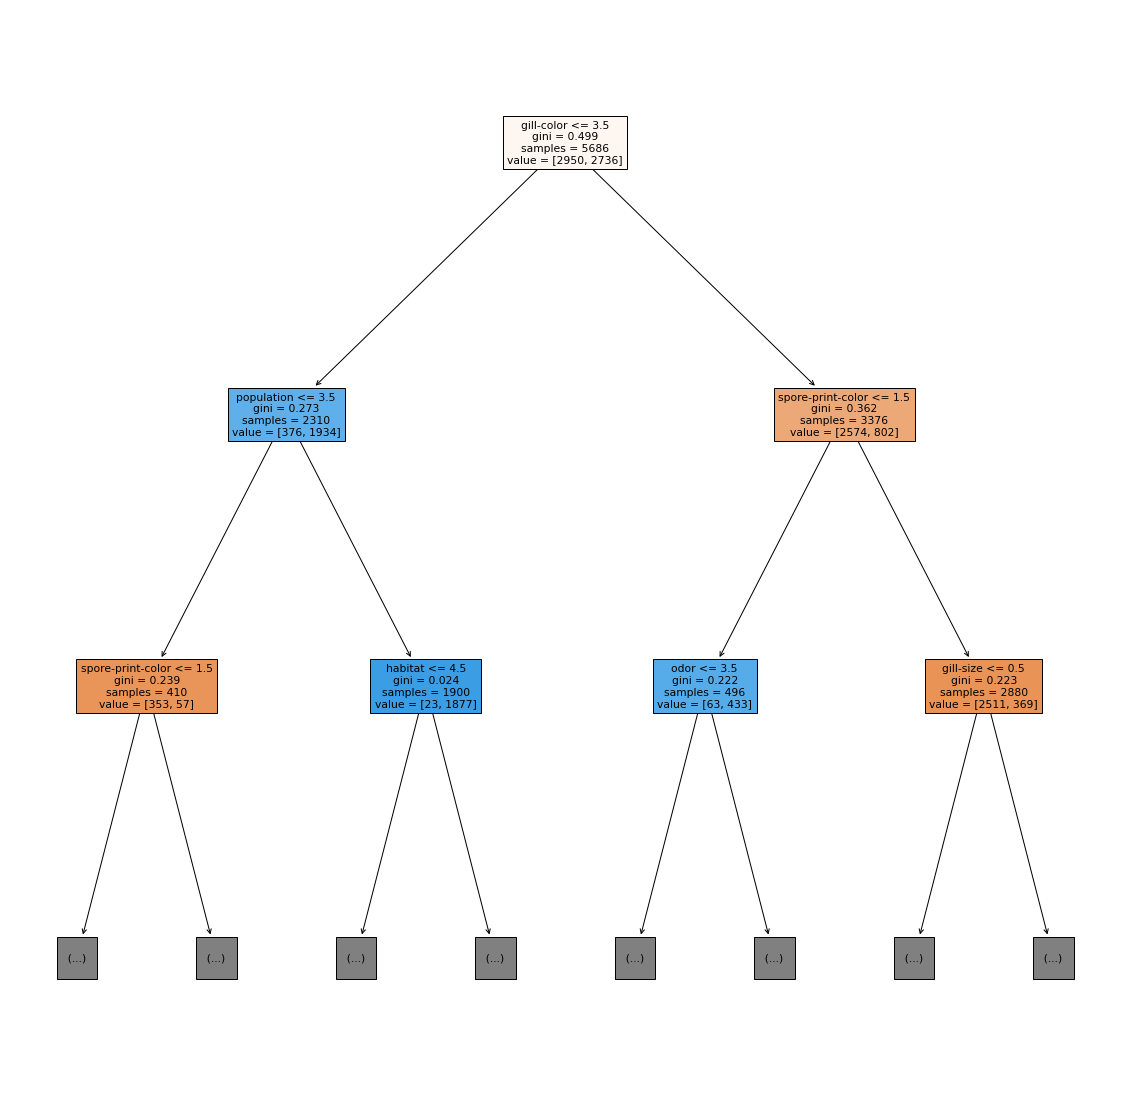

In [36]:
plt.figure(figsize = (20, 20))
plot_tree(DT, feature_names = X_train.columns, max_depth = 2, filled = True)
plt.show()

Getting important features from decision tree i.e features that most determine the classification of mushroom

In [37]:
Importance = pd.DataFrame({
    'features' : X_train.columns,
    'importance' : DT.feature_importances_
}).sort_values('importance', ascending = False)

In [38]:
Importance

,features,importance
7,gill-color,0.347457
13,spore-print-color,0.205013
14,population,0.171189
6,gill-size,0.119212
15,habitat,0.044102
4,odor,0.043935
8,stalk-shape,0.024913
11,ring-number,0.016038
1,cap-surface,0.014547
10,stalk-color-below-ring,0.006054


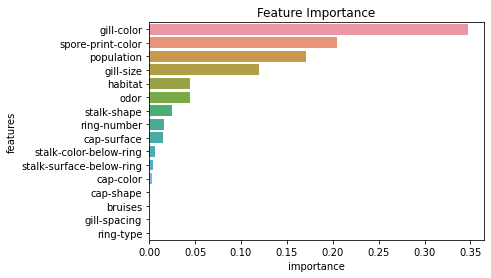

In [39]:
plt.title('Feature Importance')
sns.barplot(data = Importance, x = 'importance', y = 'features');

In [40]:
print("Decision Tree Classifier report: \n\n", classification_report(y_test, test_predict))

Decision Tree Classifier report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1258
           1       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

